<a href="https://colab.research.google.com/github/kerenprof/Dynamical-Systems/blob/main/DSN_2023_2024_Ex_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DSN - Exercise 3

Due 12/02/2024, 23:59.

**Submission guidelines:**
- You should submit to the moodle a jupyter notebook (ipynb file) with all your code, explanations (in English) and graphs.
- You should write clear, self-explanatory, documented code.
- Submission is in pairs (but you should switch your partner every exercise).



## Notebook setup

In [ ]:
# numerical library
import numpy as np

# neuron
from neuron import h, gui

# plotting library
import matplotlib.pyplot as plt

## Questions




### Question 1: Hodgkin and Huxley (HH) model in NEURON

Create an iso potential cell model ($L=20$, $diam=20$).

Use the call:

```
soma.insert('hh')
```

To add sodium, potassium and leak channels with the properties as described in the HH model.

#### 1.a

Replicate the figure from the paper (below) by starting the voltage at a different value at each run.
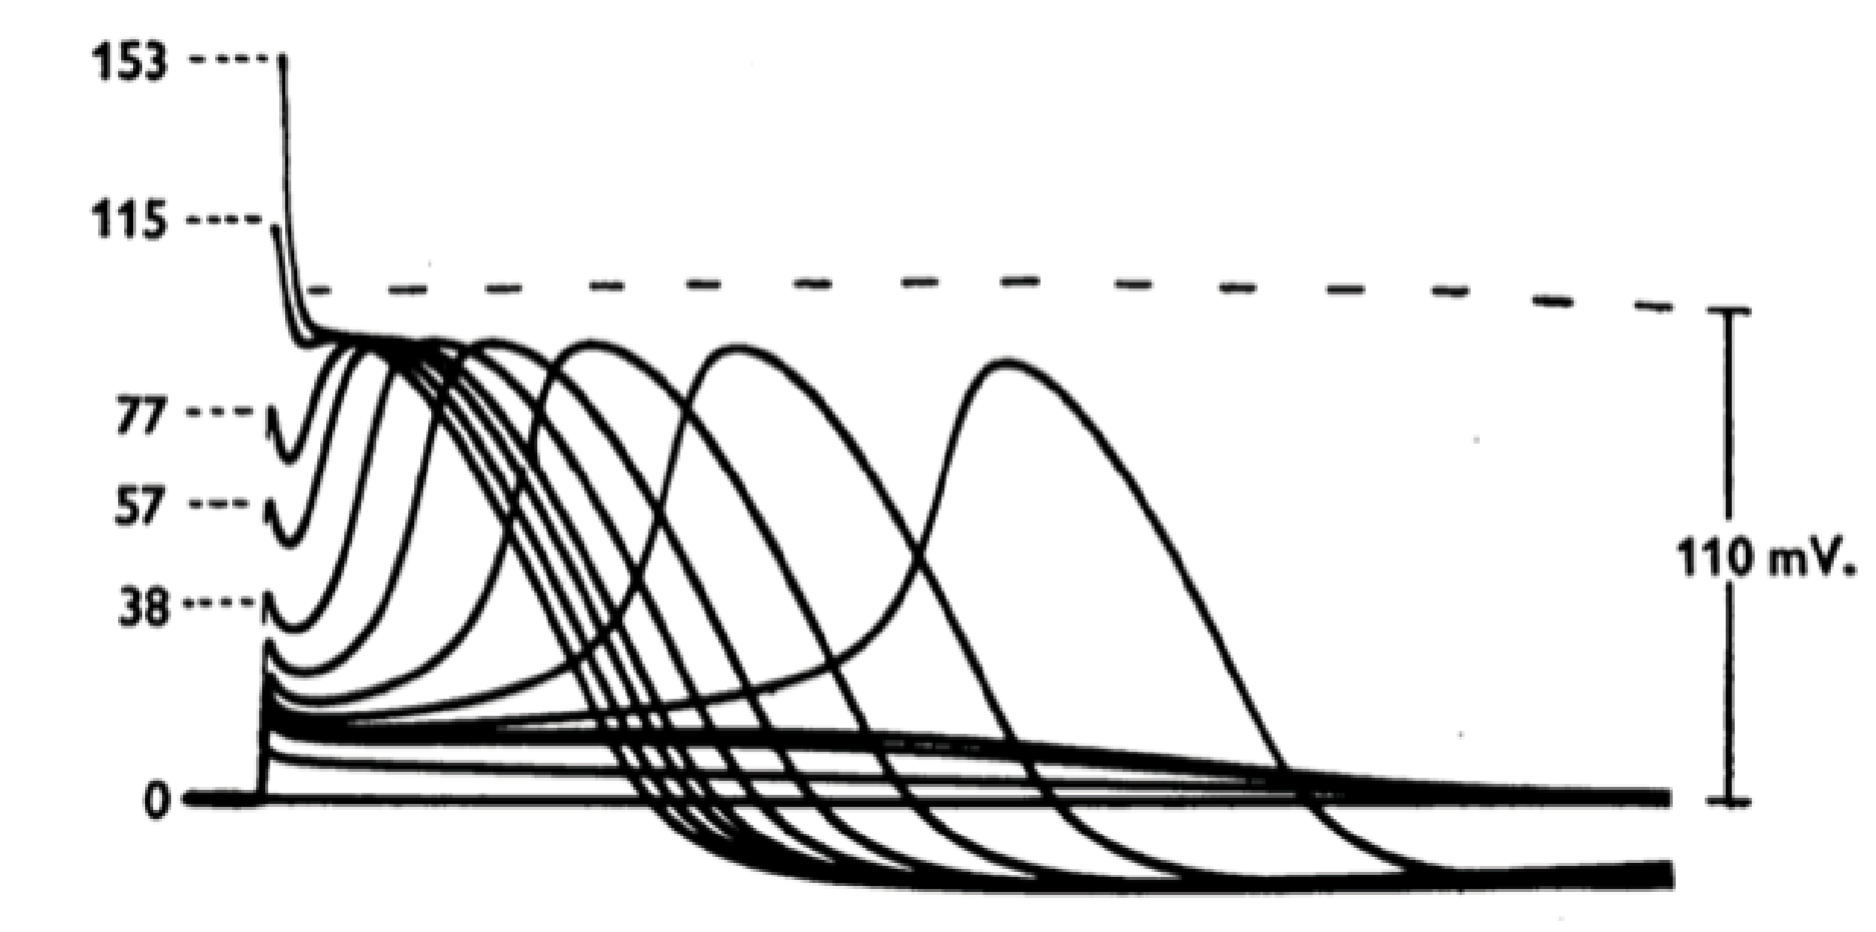

#### 1.b

Inject a $200ms$ current step of various amplitudes (please explore between $0.01nA$ and
$0.1nA$, and try at least once above $1nA$).

Plot the voltage traces and describe the model’s behavior.


What is the current threshold?

#### 1.c

Increase the capacitance by a factor of $2$, and repeat question 1.b.

What is the difference.

Can you explain it?

#### 1.d

**Set the capacitance back to 1 again.**

Use voltage clamp electrode protocol (h.VClamp, [documentation](https://www.neuron.yale.edu/neuron/static/py_doc/modelspec/programmatic/mechanisms/mech.html#VClamp)) to obtain the activation curve $n_{\infty}$ (potassium) and the inactivation curve $h_{\infty}$ (sodium), by using a similar voltage clamp protocol used by H&H as explained in class.

Plot the activation curves you obtained against the one you derive from the equation using $\dfrac{\alpha}{\alpha+\beta}$

Hints:


* You should block the relevant channels in each protocol.
* Blocking the channels can by done by:
```
soma.gnabar_hh = 0 # blocks the Na channels
soma.gkbar_hh = 0 # blocks the K channels
soma.gl_hh = 0 # blocks the leak channels
```
* In order to record the current injected by the voltage clamp, you could do:
```
stim = h.VClamp(soma(0.5))
stim_i = h.Vector()
stim_i.record(stim._ref_i)
```
* Notice that the current measured by the voltage clamp is current per the whole surface area, and you should perform subsequent calculations using the current per memebrane unit area, hence you should normalize by membrane surface area.
* Pay attention to the units.



### Question 2: Hodgkin and Huxley - Spike propagation in the axon

Create a new cell with $L = 20000$ and $nseg = 100$ (now you have an axon of length $20 mm$).

#### 2.a

Place your injection electrode at position $x=0$ (the leftmost part of the cylinder).

Inject short ($3ms$) current pulse ($10 nA$) and $delay=0$.

Measure and plot the voltage traces at $x=0, x=0.25, x=0.5, x=0.75$ and $x=1$.

#### 2.b

For each location of $x$ in which you measured the voltage, find the first time at which voltage reached $0.5$ of its maximum value (half of the peak of action potential).

#### 2.c

Using the numbers from 2.b calculate the velocity of the spike as it propagates between $x=0.25$ and $x=0.75$.

#### 2.d
Calculate the velocity of the spike as it propagates between $x=0.75$ and $x=1$.

#### 2.e

Does the speed change along the axon? If so, can you explain it? (This explanation is not mandatory).

#### 2.f

Reduce the current to the minimum value where you still initiate an action potential (Should be around $4.5$).

Does the propagation speed change between $x=0.25$ and $x=0.75$ compared to 2.c?

#### 2.g

Repeat subsection $2.b,c$ for $diameter = 1, 5,10, 50, 100$ and calculate the AP speed between as in f and g. (For simplicity you can also find the first time the voltage is above
v=0mv).

Plot the speed as a function of the axon diameter.


Using fitting, try to find a functional relationship between diameter and speed of propagation. Test your prediction on $diameter = 3$ and $200$.